In [36]:
import json
import csv
import psycopg2
import os

import numpy as np
import pandas as pd
from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns

from sum_stat_table import sum_stat_table
from outlier_table import outlier_table
from distribution_functions import get_var_by_year
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'distribution_functions'

In [15]:
# Connect to database
conn = psycopg2.connect(database="evictions"
                            , user='ev_user'
                            , password='alenaclairejustin'
                            , host='evictions.cuvbjnrvbddj.us-east-1.rds.amazonaws.com'
                            , port='5432'
                            , options=f'-c search_path=evictions')

cur = conn.cursor()

## Number of Evictions Options

In [3]:
# 2001 output
output_2001 = get_var_by_year('evictions', 2001, cur)
output_2001 = pd.DataFrame.from_records(output_2001)
series_2001 = output_2001[0]

# 2016 output
output_2016 = get_var_by_year('evictions', 2016, cur)
output_2016 = pd.DataFrame.from_records(output_2016)
series_2016 = output_2016[0]

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


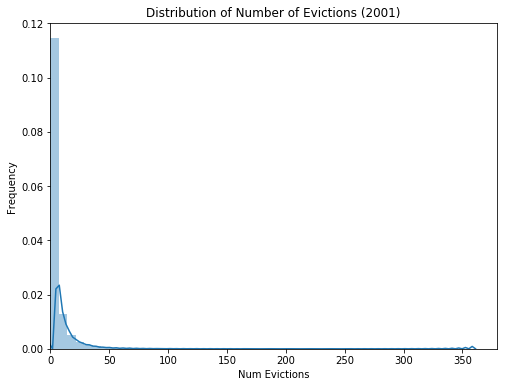

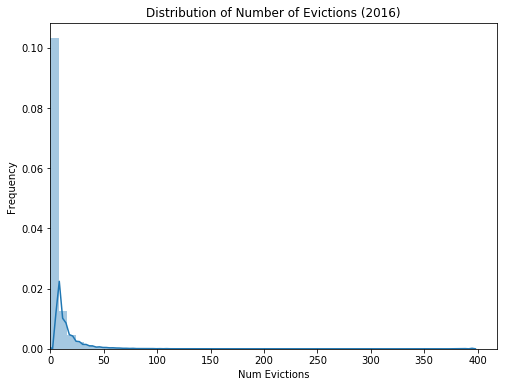

In [4]:
# Full distribution, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()])
plt.title('Distribution of Number of Evictions (2001)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

# 2016
plt.figure(figsize=(8,6))
g = sns.distplot(series_2016[~series_2016.isnull()])
plt.title('Distribution of Number of Evictions (2016)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


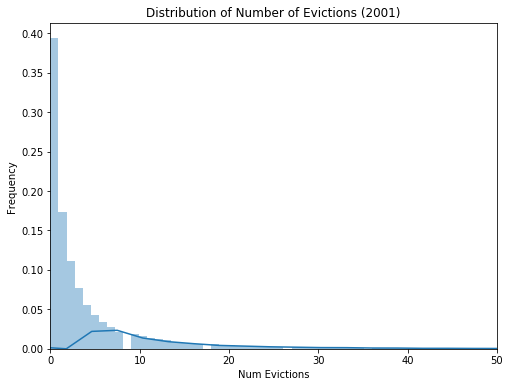

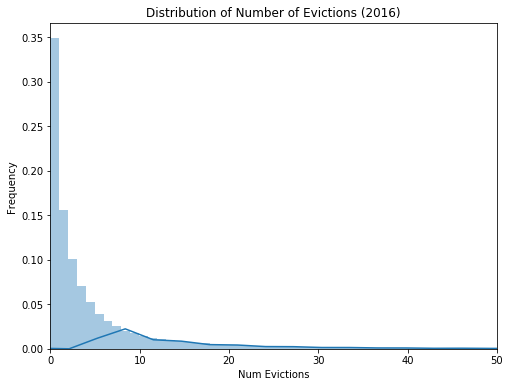

In [5]:
# Truncated, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()], bins = 400)
plt.title('Distribution of Number of Evictions (2001)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

# 2016
plt.figure(figsize=(8,6))
g = sns.distplot(series_2016[~series_2016.isnull()], bins = 400)
plt.title('Distribution of Number of Evictions (2016)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

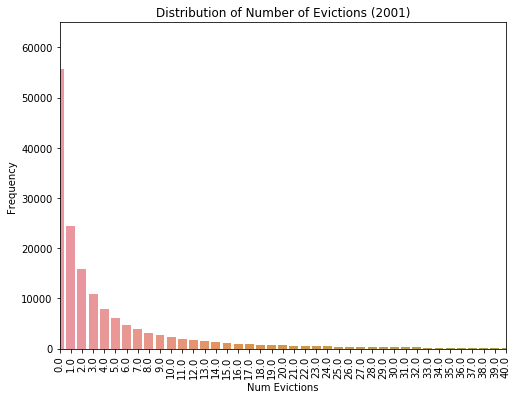

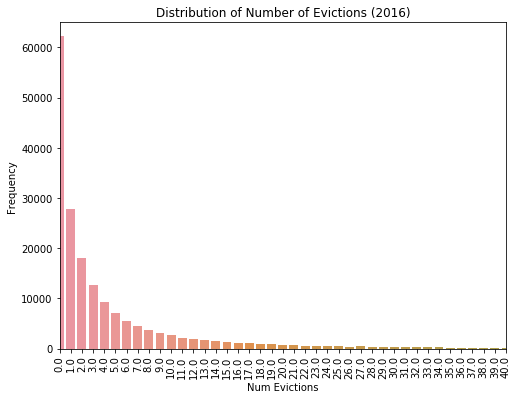

In [6]:
# Truncated, countplot
#2001
plt.figure(figsize=(8,6))
g = sns.countplot(series_2001[~series_2001.isnull()])
plt.title('Distribution of Number of Evictions (2001)')
plt.xlabel('Num Evictions')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.ylim(0,65000)
plt.xlim(0, 40)
plt.show()

#2016
plt.figure(figsize=(8,6))
g = sns.countplot(series_2016[~series_2016.isnull()])
plt.title('Distribution of Number of Evictions (2016)')
plt.xlabel('Num Evictions')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.ylim(0,65000)
plt.xlim(0, 40)
plt.show()

In [7]:
series_2001.sum()

754632.0

In [8]:
series_2016.sum()

898329.0

## Number of Eviction Filings

In [39]:
variable = 'eviction_filings'

# 2001 output
output_2001 = get_var_by_year(variable, 2001, cur)
output_2001 = pd.DataFrame.from_records(output_2001)
series_2001 = output_2001[0]

# 2016 output
output_2016 = get_var_by_year(variable, 2016, cur)
output_2016 = pd.DataFrame.from_records(output_2016)
series_2016 = output_2016[0]

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


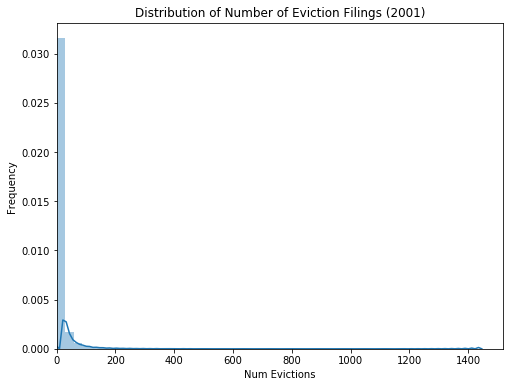

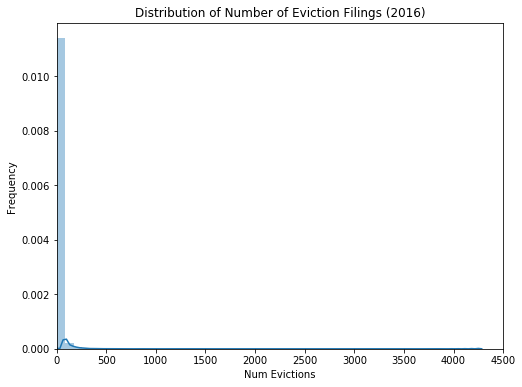

In [41]:
# Full distribution, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()])
plt.title('Distribution of Number of Eviction Filings (2001)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

# 2016
plt.figure(figsize=(8,6))
g = sns.distplot(series_2016[~series_2016.isnull()])
plt.title('Distribution of Number of Eviction Filings (2016)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


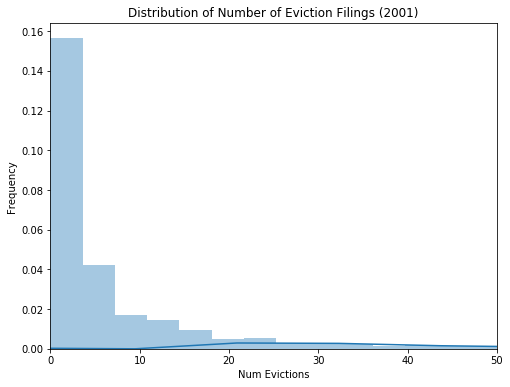

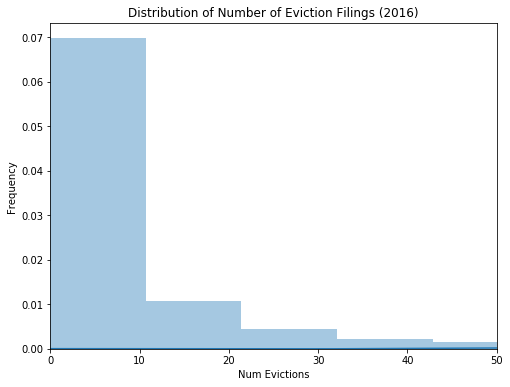

In [42]:
# Truncated, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()], bins = 400)
plt.title('Distribution of Number of Eviction Filings (2001)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

# 2016
plt.figure(figsize=(8,6))
g = sns.distplot(series_2016[~series_2016.isnull()], bins = 400)
plt.title('Distribution of Number of Eviction Filings (2016)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

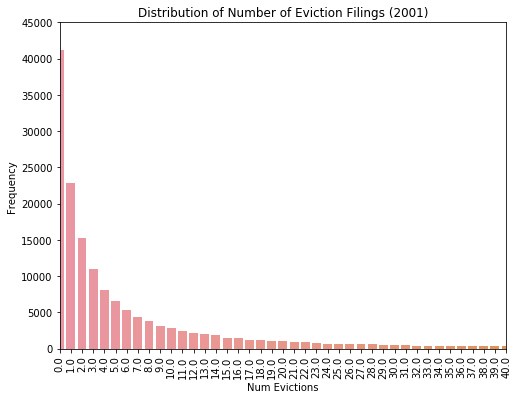

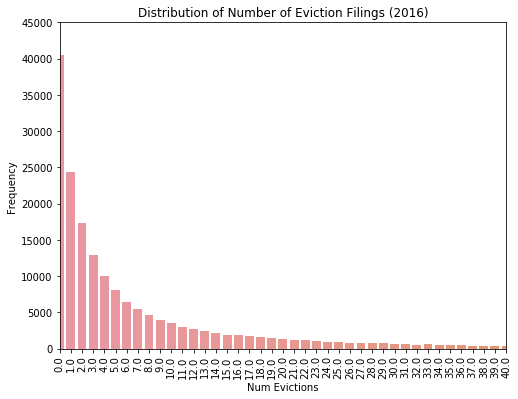

In [44]:
# Truncated, countplot
#2001
plt.figure(figsize=(8,6))
g = sns.countplot(series_2001[~series_2001.isnull()])
plt.title('Distribution of Number of Eviction Filings (2001)')
plt.xlabel('Num Evictions')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.ylim(0,45000)
plt.xlim(0, 40)
plt.show()

#2016
plt.figure(figsize=(8,6))
g = sns.countplot(series_2016[~series_2016.isnull()])
plt.title('Distribution of Number of Eviction Filings (2016)')
plt.xlabel('Num Evictions')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.ylim(0,45000)
plt.xlim(0, 40)
plt.show()

## Eviction Rates

In [9]:
variable = 'eviction_rate'

# 2001 output
output_2001 = get_var_by_year(variable, 2001, cur)
output_2001 = pd.DataFrame.from_records(output_2001)
series_2001 = output_2001[0]

# 2016 output
output_2016 = get_var_by_year(variable, 2016, cur)
output_2016 = pd.DataFrame.from_records(output_2016)
series_2016 = output_2016[0]

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


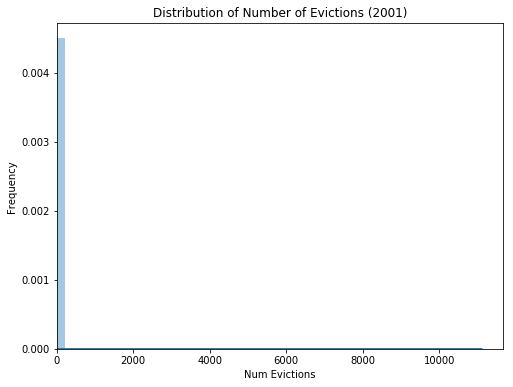

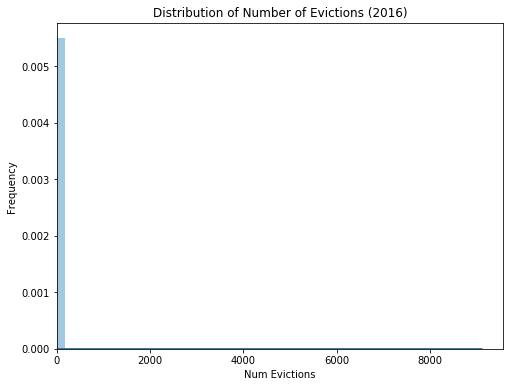

In [10]:
# Full distribution, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()])
plt.title('Eviction Rate Distribution (2001)')
plt.xlabel('% Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

# 2016
plt.figure(figsize=(8,6))
g = sns.distplot(series_2016[~series_2016.isnull()])
plt.title('Eviction Rate Distribution (2016)')
plt.xlabel('% Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


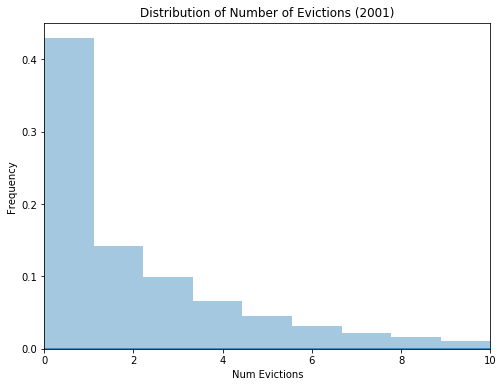

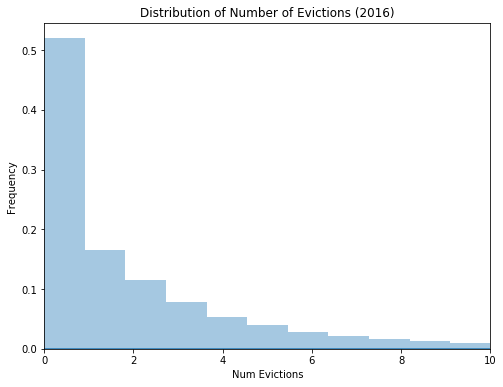

In [38]:
# Truncated, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()], kde=True, bins = 10000)
plt.title('Eviction Rate Distribution (2001)')
plt.xlabel('% Evictions')
plt.ylabel('Frequency')
plt.xlim(0, 10)
plt.show()

# 2016
plt.figure(figsize=(8,6))
g = sns.distplot(series_2016[~series_2016.isnull()], kde=True, bins = 10000)
plt.title('Eviction Rate Distribution (2016)')
plt.xlabel('% Evictions')
plt.ylabel('Frequency')
plt.xlim(0, 10)
plt.show()

## Eviction Trends Over Time

In [24]:
cur.execute("SELECT year, sum(evictions) as ev_tot, avg(eviction_rate) " 
            +"as ev_avgrate, sum(eviction_filings) as file_tot, avg(eviction_filing_rate) as filerate_avg " 
            +"FROM evictions.blockgroup WHERE population>0 GROUP BY year;")
output = cur.fetchall()


In [25]:
col_names = ['Year', 'Total_Evictions', 'Avg_Eviction_Rate', 
             'Total_Filings', 'Total_Eviction_Rate']
df = pd.DataFrame.from_records(output, columns = col_names).sort_values('Year')
df

,Year,Total_Evictions,Avg_Eviction_Rate,Total_Filings,Total_Eviction_Rate
2,2000,518768.0,2.688277,1158918.0,5.308049
12,2001,754468.0,2.714374,1750119.0,5.588899
10,2002,864687.0,2.855921,2085022.0,6.489915
3,2003,910003.0,3.434599,2133429.0,10.207360
7,2004,940184.0,3.340237,2175783.0,9.123663
4,2005,968079.0,3.474974,2304274.0,10.838524
1,2006,1018372.0,4.347696,2438953.0,11.327045
8,2007,957248.0,3.241487,2000439.0,8.341330
14,2008,994668.0,5.634645,2077349.0,10.237780
6,2009,951275.0,6.644531,2106115.0,17.885136


/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


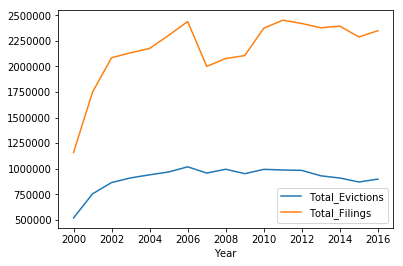

In [26]:
df.plot(x='Year', y = ['Total_Evictions', 'Total_Filings'], kind = 'line' )
plt.show()

/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


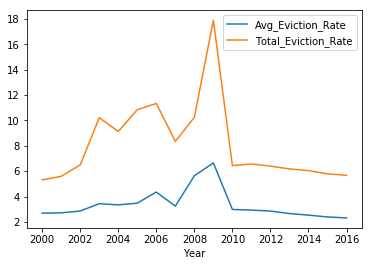

In [27]:
df.plot(x='Year', y = ['Avg_Eviction_Rate', 'Total_Eviction_Rate'], kind = 'line' )
plt.show()

# I think these are above 1 because of small population/multiple eviction proceedings per household... need to adjust

## Rate vs Population

In [28]:
cur.execute("SELECT year, population, eviction_rate FROM evictions.blockgroup WHERE year=2016 and population>0;")
output = cur.fetchall()

In [29]:
col_names = ['Year', 'Population', 'Eviction_Rate']
df = pd.DataFrame.from_records(output, columns = col_names)
df.head()

,Year,Population,Eviction_Rate
0,2016,982.0,NaN
1,2016,1116.0,NaN
2,2016,1206.0,NaN
3,2016,1065.0,NaN
4,2016,2038.0,NaN


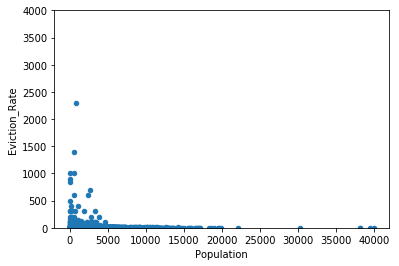

In [30]:
df.plot(x='Population', y='Eviction_Rate', kind='scatter')
plt.ylim(0,4000)
plt.show()

In [34]:
df[df['Eviction_Rate']>100]

,Year,Population,Eviction_Rate
2938,2016,634.0,1400.00
21836,2016,520.0,1000.00
30418,2016,85.0,300.00
33623,2016,1122.0,136.96
44556,2016,17.0,900.00
53602,2016,209.0,200.00
55931,2016,707.0,300.00
60490,2016,2432.0,600.00
62469,2016,147.0,150.00
63717,2016,166.0,400.00


# Summary Statistics Table

In [33]:
sum_stat= sum_stat_table(cur)

In [34]:
sum_stat

,avg,max,min,std,variables
0,1383.688057,39961.00,0.0,781.657001,population
1,9.557322,138.86,0.0,12.074228,poverty_rate
2,33.700982,100.00,0.0,25.180474,pct_renter_occupied
3,777.837587,6600.00,0.0,471.367187,median_gross_rent
4,51966.111374,750003.00,0.0,32627.229012,median_household_income
5,192659.037998,3458400.00,0.0,192467.721624,median_property_value
6,27.768474,251.80,0.0,13.938280,rent_burden
7,66.476445,100.00,0.0,31.296793,pct_white
8,12.631181,100.00,0.0,22.756710,pct_af_am
9,13.672512,100.00,0.0,21.045191,pct_hispanic


In [31]:
sum_stat = pd.read_csv('sum_stat_table.csv', index_col = False)
sum_stat = sum_stat[["variable", "avg", "max", "min", "std"]]

KeyError: "['variable'] not in index"

In [11]:
outlier_table = pd.read_csv('outlier_table.csv', index_col = False)
outlier_table = outlier_table[["variable", "count high", "avg high", "count low", "avg low"]]

In [20]:
full_table = sum_stat.merge(outlier_table, on = 'variable')

In [21]:
full_table

,avg,max,min,std,variable,count high,avg high,count low,avg low
0,1383.688057,39961.00,0,781.657001,population,44076,5.138397e+03,0,NaN
1,9.557322,138.86,0,12.074228,poverty_rate,80143,5.696680e+01,0,NaN
2,33.700982,100.00,0,25.180474,pct_renter_occupied,0,NaN,0,NaN
3,777.837588,6600.00,0,471.367188,median_gross_rent,37589,2.670946e+03,0,NaN
4,51966.111370,750003.00,0,32627.229010,median_household_income,60966,1.898563e+05,0,NaN
5,192659.038000,3458400.00,0,192467.721600,median_property_value,78280,1.034448e+06,0,NaN
6,27.768474,251.80,0,13.938280,rent_burden,26400,8.556200e+01,0,NaN
7,66.476445,100.00,0,31.296793,pct_white,0,NaN,0,NaN
8,12.631181,100.00,0,22.756710,pct_af_am,150845,9.224528e+01,0,NaN
9,13.672512,100.00,0,21.045191,pct_hispanic,119024,8.838421e+01,0,NaN
